# 8.1 Scipy를 이용한 확률분포 분석


In [21]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

## 확률분포 클래스
확률분포 객체 생성 명령

종류|명령|확률분포
-|-|-
이산|`bernouli`|베르누이분포
이산|`binom`|이항분포
이산|`multinomial`|다항분포
연속|`uniform`|균일분포
연속|`norm`|정규분포
연속|`beta`|베타분포
연속|`gamma`|감마분포
연속|`t`|스튜던트 t분포
연속|`chi2`|카이 제곱분포
연속|`f`|F분포
연속|`dirichlet`|디리클리분포
연속|`multivariate_normal`|다변수 정규분포

In [8]:
# 정규분포 확률변수 객체 생성
rv = sp.stats.norm()

In [9]:
rv.mean(), rv.std()

(0.0, 1.0)

## 모수 지정
- 확률분포 객체 생성 시, 분포 형상을 정의하는 모수(parameter)를 인수로 입력해야 함
- 대부분 다음과 같은 모수를 공통적으로 갖는다
    - `loc` : 일반적으로 분포의 기댓값
    - `scale` : 일반적으로 분포의 표준편차

In [10]:
# 기댓값 1, 표준편차 2인 정규분포 객체
rv = sp.stats.norm(loc=1, scale=2)
print(rv.mean(), rv.std())

1.0 2.0


## 확률분포 메서드
확률분포 객체가 갖는 메서드는 다음과 같다.

메서드|기능
-|-
`pmf`|확률질량함수(probability mass function)
`pdf`|확률밀도함수(probability density function)
`cdf`|누적분포함수(cumulative distribution function)
`ppf`|누적분포함수의 역함수(inverse cumulative distribution function)
`sf`|생존함수(survival function) = 1 - 누적분포함수
`isf`|생존함수의 역함수(inverse survival function)
`rvs`| 랜덤 표본 샘플링(random variable sampling)

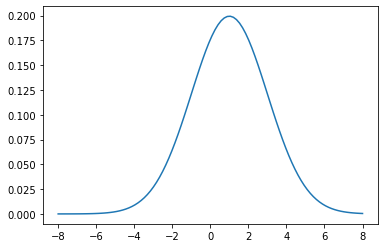

In [14]:
# pdf
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)

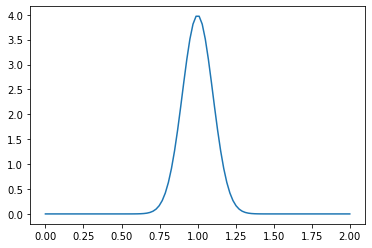

In [18]:
rv = sp.stats.norm(loc=1, scale=0.1)
xx = np.linspace(0, 2, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)

## 무작위 표본 생성
`rvs`(random value sampling)
- `size`  : 표본 생성 시 생성되는 표본 크기
- `random_state` : 표본 생성 시 사용되는 시드(seed) 값

In [19]:
rv.rvs(size=(3,5), random_state=0)

array([[1.17640523, 1.04001572, 1.0978738 , 1.22408932, 1.1867558 ],
       [0.90227221, 1.09500884, 0.98486428, 0.98967811, 1.04105985],
       [1.01440436, 1.14542735, 1.07610377, 1.0121675 , 1.04438632]])

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


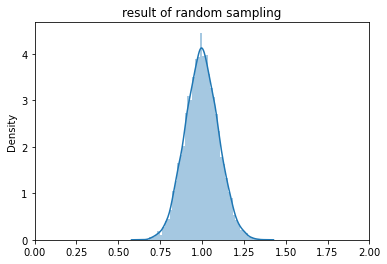

In [27]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('result of random sampling')
plt.xlim(0, 2)
plt.show()

## 변환 확률변수 시뮬레이션
시뮬레이션 기능을 활용하여 확률변수 표본을 가공 > 변환시킨 확률변수의 분포를 확인 가능
- 0-1 사이 균일분포 갖는 확률변수에서 두 표본을 생성하여 합하면 어떤 분포일까?

(-0.2, 2.2)

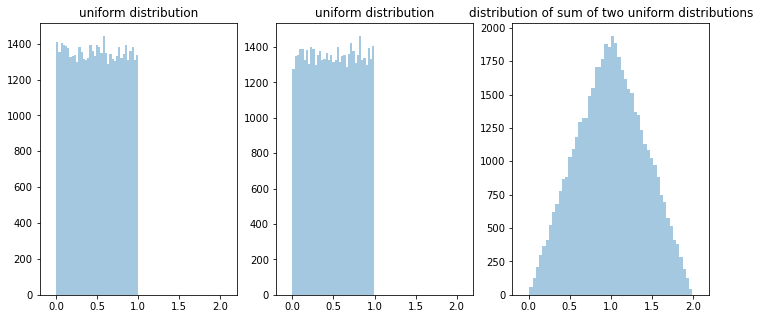

In [30]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12,5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("uniform distribution")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("uniform distribution")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("distribution of sum of two uniform distributions")
plt.xlim(-0.2, 2.2)